**Step 1**: Import all the necessary package will be used for computation .

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Step 2**: Read the input file using pandas.

In [75]:
data = pd.read_csv('../data/happiness_alcohol_consumption.csv')
data

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97
...,...,...,...,...,...,...,...,...,...
117,Tanzania,Sub-Saharan Africa,south,3.666,533,878.000,36,6,1
118,Liberia,Sub-Saharan Africa,north,3.622,432,455.000,19,152,2
119,Benin,Sub-Saharan Africa,north,3.484,512,789.000,34,4,13
120,Togo,Sub-Saharan Africa,north,3.303,500,577.000,36,2,19


In [76]:
data['Alcohol'] = data[['Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita',]].sum(axis=1)
data = data[['Country', 'HappinessScore', 'Alcohol']]
data

,Country,HappinessScore,Alcohol
0,Denmark,7.526,583
1,Switzerland,7.509,565
2,Iceland,7.501,372
3,Norway,7.498,369
4,Finland,7.413,493
...,...,...,...
117,Tanzania,3.666,43
118,Liberia,3.622,173
119,Benin,3.484,51
120,Togo,3.303,57


**Step 3**: Filter only the required variables

In [77]:
A = data[['Alcohol','HappinessScore']]
A.tail()

,Alcohol,HappinessScore
117,43,3.666
118,173,3.622
119,51,3.484
120,57,3.303
121,56,3.069


**Step 4**: Convert the pandas data frame in to numpy array .

In [78]:
matrix = np.array(A.values,'float')
matrix[0:5,:]    #first 5 rows of data

array([[583.   ,   7.526],
       [565.   ,   7.509],
       [372.   ,   7.501],
       [369.   ,   7.498],
       [493.   ,   7.413]])

**Step 5**: Let’s assign input and target variable , x and y for further computation.

In [79]:
# Assign input and target variable
X = matrix[:,0]
y = matrix[:,1]

**Step 6**: Feature Normalisation - It is one of the important steps for many ML models, what we actually do is compressing all our input variable in to smaller and similar magnitude so that later computation will be faster and efficient. Below we have one of the feature normalisation techniques used to make the input variable x in similar magnitude .

In [80]:
# feature normalization# input variable divided by maximum value among input values in X
X = X/(np.max(X))

**Step 7**: Since it is one input variable and one output variable, we can plot the 2d plot and see how it is distributed. It will help us to understand the data and problem in better way.

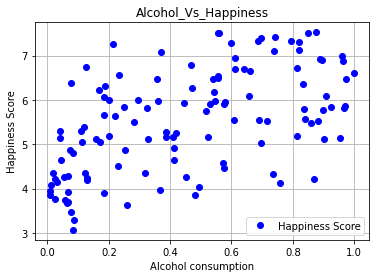

In [81]:
plt.plot(X,y,'bo')
plt.ylabel('Happiness Score')
plt.xlabel('Alcohol consumption')
plt.legend(['Happiness Score'])
plt.title('Alcohol_Vs_Happiness')
plt.grid()
plt.show()

now we need to define the linear relationship between alcohol consumption and happiness

$$h(x) = \Theta_x^t = \theta_0 X_0 + \theta_1 x_1$$

We know the value for x, y from sample data. Using that we have to compute optimal $\theta_0$ and $\theta_1$ which has minimal error cost, to plot the linear fit.

**definition**: *Cost or SSE (sum of squared error) is the difference between our hypothesis and actual data points*

**Step 8**: let’s define the function to calculate the cost or SSE .

In [82]:
def compute_cost(x, y, theta):
    a = 1 / (2 * m)
    b = np.sum(((x@theta)-y)**2)
    j = a * b
    return j

**Step 9**: Appending a term $x_0$ in our existing matrix X for mathematical convenience, $x_0$ should be having values as ‘1’. and assign some initial $\theta$ as 0.

In [83]:
#initialising parameter
m = np.size(y)
X = X.reshape([122,1])
x = np.hstack([np.ones_like(X), X])
theta = np.zeros([2,1])
print(theta,'\n', m)

[[0.]
 [0.]] 
 122


Let’s compute what would be the cost if theta is zero.

In [84]:
print(compute_cost(x, y, theta))

1941.7825705000002


Our aim is to reduce this cost J($\theta$) value further, so that we can achieve the optimal linear fit for our data.

**Step 10**: Defining function for gradient descent algorithm.

In [85]:
def gradient(x, y, theta):
    alpha = 0.00001
    iteration = 2000  #gradient descend algorithm
    J_history = np.zeros([iteration, 1])
    for iter in range(0,2000):
        error = (x @ theta) -y
        temp0 = theta[0] - ((alpha/m) * np.sum(error*x[:, 0]))
        temp1 = theta[1] - ((alpha/m) * np.sum(error*x[:, 1]))
        theta = np.array([temp0,temp1]).reshape(2,1)
        J_history[iter] = (1 / (2*m) ) * (np.sum(((x @ theta) - y) ** 2))  # compute J value for each iteration
    return theta, J_history

Now let’s use the gradient function for our data ,

In [86]:
theta , J = gradient(x, y, theta)
print(theta)

[[4.22499706]
 [2.38031097]]


Now we have got the optimal theta computed by gradient descend, but how can we be sure that this the optimal one, `using compute_cost()` function we can see it.

In [87]:
theta , J = gradient(x, y, theta)
print(J)

[[115.49055075]
 [115.48857742]
 [115.4866392 ]
 ...
 [127.6038163 ]
 [127.61071069]
 [127.61760496]]


cost or SSE value is 127.62 which is much better than 1941.78 was calculated when $\theta = 0$

**Step 11**: Now let’s plot our line on data to see how well it fits the data.

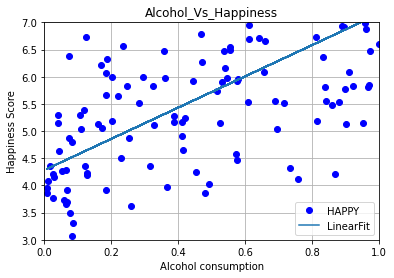

In [88]:
# plot linear fit for our theta
plt.plot(X, y, 'bo')
plt.plot(X, x@theta, '-')
plt.axis([0, 1, 3, 7])
plt.ylabel('Happiness Score')
plt.xlabel('Alcohol consumption')
plt.legend(['HAPPY','LinearFit'])
plt.title('Alcohol_Vs_Happiness')
plt.grid()
plt.show()

**Step 12**: Let’s predict for new input value

In [89]:
predict1 = [1, (164 / np.max(matrix[:, 0]))] @ theta # normalising the input value, 1 is for intercept term so not need to normalise
print(predict1)

[4.99016995]


let ‘s see how it worked for model.

In [90]:
# visualising J (theta0 , theta1)
theta0_vals = np.linspace(-5,10,100).reshape(1,100)
theta1_vals = np.linspace(-5,10,100).reshape(1,100)  #initialise J value to matrix of 0
J_vals = np.zeros([np.size(theta0_vals),np.size(theta1_vals)])  #fill J_vals
for i in range(0,np.size(theta0_vals)):
    for j in range(0,np.size(theta1_vals)):
        t = np.array([theta0_vals[:,i],theta1_vals[:,j]])
        J_vals[i,j] = compute_cost(x,y,t)  # Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

Now let’s plot.

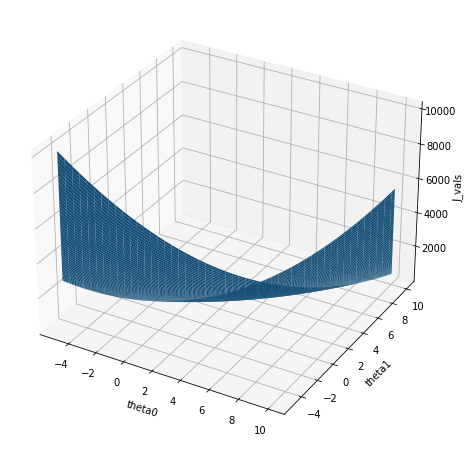

In [91]:
# surface plot for covergence
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=[12.0, 8.0])
ax = fig.add_subplot(111, projection ='3d')
ax.plot_surface(theta0_vals,theta1_vals,J_vals)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J_vals')
plt.show()